In [1]:
from json import dumps
from time import sleep
from kafka import KafkaProducer
from kafka import KafkaConsumer
from json import loads
import pyspark
from pyspark.sql import *
import matplotlib.pyplot as plt

In [2]:
consumer = KafkaConsumer(
    'my-topic',
     bootstrap_servers=['localhost:9092'],
     auto_offset_reset='earliest',
     enable_auto_commit=True,
     group_id='my-group',
     value_deserializer=lambda x: loads(x.decode('utf-8')))

In [3]:
sc = pyspark.SparkContext()
sqlContext = SQLContext(sc)

/home/patate/.local/lib/python3.8/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
df = []

In [12]:
count = 0
for message in consumer:
    # message value and key are raw bytes -- decode if necessary!
    # e.g., for unicode: `message.value.decode('utf-8')`
    print ("%s:%d:%d:" % (message.topic, message.partition,
                                          message.offset))
    id = message.value['id']
    date = message.value['date']
    data = message.value['data']
    
    df.append(pyspark.Row(id=id, date=date, data=data))

my-topic:0:1210:
my-topic:1:1217:
my-topic:0:1211:
my-topic:0:1212:
my-topic:0:1213:
my-topic:0:1214:
my-topic:0:1215:
my-topic:1:1218:
my-topic:1:1219:
my-topic:0:1216:
my-topic:1:1220:
my-topic:0:1217:
my-topic:1:1221:
my-topic:0:1218:
my-topic:0:1219:
my-topic:1:1222:
my-topic:1:1223:
my-topic:0:1220:
my-topic:0:1221:
my-topic:1:1224:
my-topic:1:1225:
my-topic:1:1226:
my-topic:0:1222:
my-topic:0:1223:
my-topic:0:1224:
my-topic:1:1227:
my-topic:0:1225:
my-topic:1:1228:
my-topic:1:1229:
my-topic:1:1230:
my-topic:0:1226:
my-topic:0:1227:
my-topic:0:1228:
my-topic:1:1231:
my-topic:0:1229:
my-topic:1:1232:
my-topic:0:1230:
my-topic:1:1233:
my-topic:0:1231:
my-topic:0:1232:
my-topic:0:1233:
my-topic:1:1234:
my-topic:1:1235:
my-topic:0:1234:
my-topic:0:1235:
my-topic:1:1236:
my-topic:1:1237:
my-topic:0:1236:
my-topic:0:1237:
my-topic:0:1238:
my-topic:1:1238:
my-topic:1:1239:
my-topic:1:1240:
my-topic:0:1239:
my-topic:1:1241:
my-topic:0:1240:
my-topic:1:1242:
my-topic:1:1243:
my-topic:1:124

KeyboardInterrupt: 

In [6]:
df2 = sqlContext.createDataFrame(df)
df2.show()

+-----+--------------------+--------------------+
|   id|                date|                data|
+-----+--------------------+--------------------+
|14857|"2021-12-10T21:32...|[[[209, 27, 228],...|
|14857|"2021-12-10T21:32...|[[[126, 1, 50], [...|
|14857|"2021-12-10T21:32...|[[[230, 238, 94],...|
|14857|"2021-12-10T21:32...|[[[126, 186, 40],...|
+-----+--------------------+--------------------+



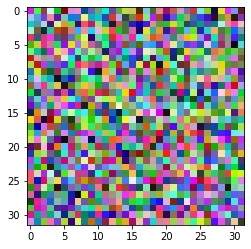

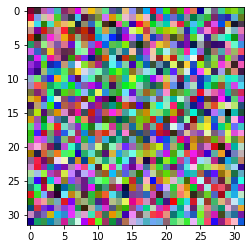

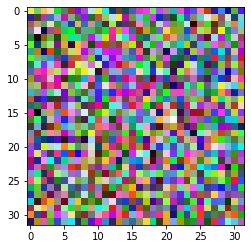

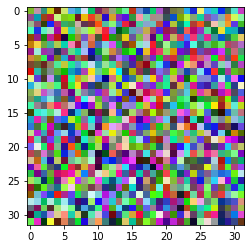

In [7]:
#select all data from df2 and store it in a df named images
images = df2.select('data')
for e in images.collect():
    plt.imshow(loads(e.data))
    plt.show()